In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib
matplotlib.rcParams['figure.figsize'] = (12, 8)

import warnings
warnings.filterwarnings('ignore')

# k Nearest Neighbors (kNN)
Метод k ближайших соседей рассчитывает расстояния от нового объекта до всех объектов выборки и, отбирая k ближайших, предсказывает целевую переменную с помощью голосования (в случае классификации) или усреднения (в случае регрессии). \
При этом этот метод можно по-разному настраивать, например можно изменить способ подсчета расстояний или способ взвешивания соседей по расстоянию. \
Для начала скачаем датасет и визуализируем данные.

In [2]:
circ = pd.read_csv('concertriccir2.csv')
circ.head()

,X,Y,class
0,0.70,-0.247,0.0
1,-3.95,2.740,1.0
2,0.15,-2.160,1.0
3,-1.67,-0.942,1.0
4,2.56,-1.850,1.0


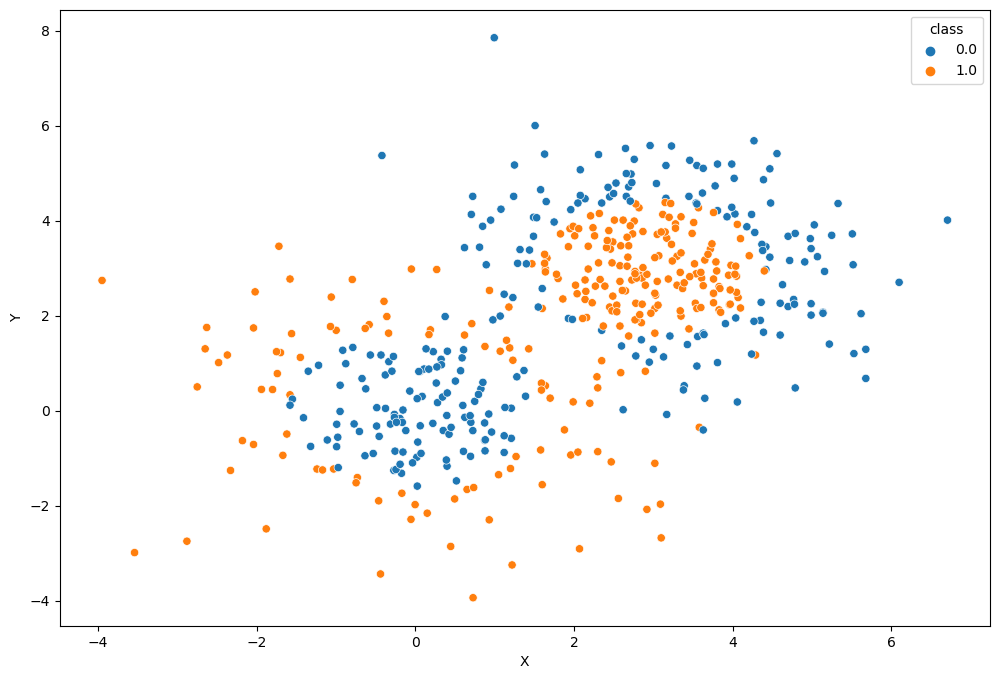

In [3]:
sns.scatterplot(x=circ['X'], y=circ['Y'], hue=circ['class']);

**Задание 1.** Обучите логистическую регрессию на данных и нарисуйте разделяющую гиперплоскость (прямую) на рисунке с данными. Как линейный классификатор справился с задачей? Сделайте вывод исходя из геометрии данных и линии разделения. Какой accuracy выйдет на всей выборке (без валидации)?

In [4]:
from sklearn.linear_model import LogisticRegression

### Your code is here
# Создадим и обучим модель
lr = LogisticRegression()
X = circ.drop('class', axis=1)
y = circ['class']
lr.fit(X, y)

LogisticRegression()

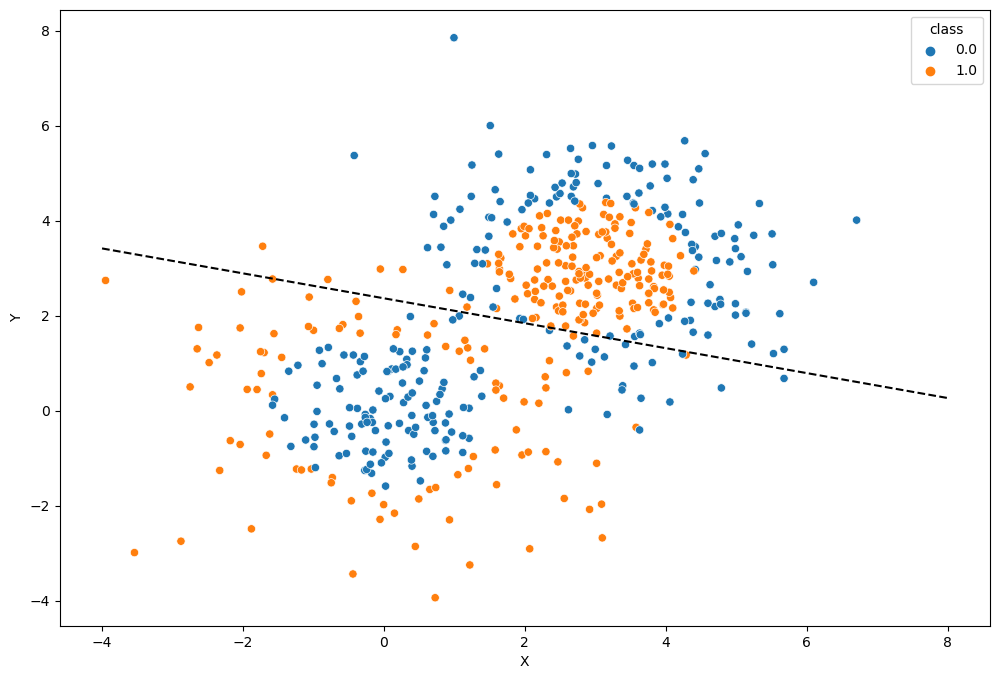

In [5]:
# Простроим разделяющую пряму опираясь на знания математики
sns.scatterplot(x=circ['X'], y=circ['Y'], hue=circ['class']);

# y = mx + c; c = -w0/w2; m = -w1/w2
w0, w1, w2 = lr.intercept_[0], lr.coef_.T[0], lr.coef_.T[1] 
c = -w0/w2
m = -w1/w2
x_plt = np.array([-4, 8])
y_plt = m*x_plt + c
plt.plot(x_plt, y_plt, color='black', ls='--')

In [6]:
from sklearn.metrics import accuracy_score

accuracy_score(y, lr.predict(X))

0.424

**Задание 2.** Разделите обучающую выборку и обучите 6 моделей kNN с различным числом соседей из `all_k`, сохраните обученные классификаторы в список. \
Выведите accuracy на тренировочной и тестовой выборке для каждой модели. Каково оптимальное число соседей с точки зрения accuracy?

In [7]:
X = circ[['X', 'Y']].values
y = circ['class'].values.astype('int')

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    shuffle=True, random_state=2022)

In [9]:
from sklearn.neighbors import KNeighborsClassifier
all_k = [1, 3, 10, 30, 40, 60]

### Your code is here
# Построим и сравним модели
for k in all_k:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    print(f'{k} соседей')
    print(f'Accuracy на трейне: {accuracy_score(y_train, model.predict(X_train))}')
    print(f'Accuracy на тесте: {accuracy_score(y_test, model.predict(X_test))}')
    print()

1 соседей
Accuracy на трейне: 1.0
Accuracy на тесте: 0.89

3 соседей
Accuracy на трейне: 0.9475
Accuracy на тесте: 0.87

10 соседей
Accuracy на трейне: 0.915
Accuracy на тесте: 0.85

30 соседей
Accuracy на трейне: 0.8525
Accuracy на тесте: 0.74

40 соседей
Accuracy на трейне: 0.8
Accuracy на тесте: 0.75

60 соседей
Accuracy на трейне: 0.6925
Accuracy на тесте: 0.73



**Задание 3.** Скачайте уже известный вам датасет [SigmaCabs](https://www.kaggle.com/datasets/arashnic/taxi-pricing-with-mobility-analytics). Обучите классификатор kNN на отнормированных и не отнормированных данных, подобрав лучшие гиперпараметры среди $k \in [1, 5, 10]$. Замерьте качество на тестовой выборке. \
Почему нормирование данных помогает улучшить качество?

In [10]:
df = pd.read_csv('processed_sigma_cabs.csv')
df.head()

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Surge_Pricing_Type,Type_of_Cab_B,...,Destination_Type_F,Destination_Type_G,Destination_Type_H,Destination_Type_I,Destination_Type_J,Destination_Type_K,Destination_Type_L,Destination_Type_M,Destination_Type_N,Gender_Male
0,6.77,1.0,2.42769,3.90500,0,40.0,46,60,2,1,...,0,0,0,0,0,0,0,0,0,0
1,29.47,10.0,2.78245,3.45000,0,38.0,56,78,2,1,...,0,0,0,0,0,0,0,0,0,1
2,41.58,10.0,2.79805,3.50125,2,61.0,56,77,2,1,...,0,0,0,0,0,0,0,0,0,1
3,61.56,10.0,2.79805,3.45375,0,61.0,52,74,3,0,...,0,0,0,0,0,0,0,0,0,1
4,54.95,10.0,3.03453,3.40250,4,51.0,49,102,2,0,...,0,0,0,0,0,0,0,0,0,1


In [11]:
X = df.drop('Surge_Pricing_Type', axis=1)
y = df['Surge_Pricing_Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    shuffle=True, random_state=2022)

In [12]:
### Your code is here
# Построим и сравним модели
for k in [1, 5, 10]:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    print(f'{k} соседей')
    print(f'Accuracy на трейне: {accuracy_score(y_train, model.predict(X_train.values))}')
    print(f'Accuracy на тесте: {accuracy_score(y_test, model.predict(X_test.values))}')
    print()

1 соседей
Accuracy на трейне: 1.0
Accuracy на тесте: 0.43819542019519236

5 соседей
Accuracy на трейне: 0.6302917525088058
Accuracy на тесте: 0.44317016671097104

10 соседей
Accuracy на трейне: 0.5848626684009153
Accuracy на тесте: 0.4703603843086621



In [13]:
from sklearn.preprocessing import StandardScaler

# Отнормируем
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Построим и сравним модели
for k in [1, 5, 10]:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    print(f'{k} соседей')
    print(f'Accuracy на трейне: {accuracy_score(y_train, model.predict(X_train))}')
    print(f'Accuracy на тесте: {accuracy_score(y_test, model.predict(X_test))}')
    print()

1 соседей
Accuracy на трейне: 1.0
Accuracy на тесте: 0.5648805681084571

5 соседей
Accuracy на трейне: 0.73491630984819
Accuracy на тесте: 0.6303877264269168

10 соседей
Accuracy на трейне: 0.7076018950146683
Accuracy на тесте: 0.6607678578209851



**Задание 4.** Обучите классификатор kNN на отнормированных данных с помощью метрики Минковского. 
$$
\rho(x, z) = \bigg(\sum_i |x_i - z_i|^p\bigg) ^{1/p}
$$

Значение параметра `p` возьмите равным единице. Замерьте качество на тестовой выборке и сравните с предыдущим заданием, где `p = 2`.

In [14]:
### Your code is here
model = KNeighborsClassifier(n_neighbors=10, metric='minkowski', p=1)
model.fit(X_train, y_train)
print(f'Accuracy на трейне: {accuracy_score(y_train, model.predict(X_train))}')
print(f'Accuracy на тесте: {accuracy_score(y_test, model.predict(X_test))}')

Accuracy на трейне: 0.7077443059366366
Accuracy на тесте: 0.6611476094634109


**Задание 5.** Скачайте датасет [California Housing Prices](https://www.kaggle.com/datasets/camnugent/california-housing-prices), в котором мы будем предсказывать среднюю стоимость жилья. В качестве признаков будем использовать `['longitude', 'latitude']`, посмотрите на них с помощью scatterplot. \
По какой характеристике наш kNN регрессор в этом случае подбирает соседей?

1. Обучите обыкновенную линейную регрессию и замерьте RMSE на тренировочной и тестовой выборках.
2. Обучите kNN регрессор на отнормированных данных, подобрав лучшие гиперпараметры $k \in [1, 2, ..., 9]$. 
3. Обучите kNN регрессор с гауссовским ядром, взяв параметр k из предыдущего пункта и подобрав оптимальное значение ширины окна среди предложенных $h \in np.arange(0.02, 0.1, 0.01)$.

Как ширина окна влияет на веса при усреднении ответа по соседям? 

In [15]:
df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


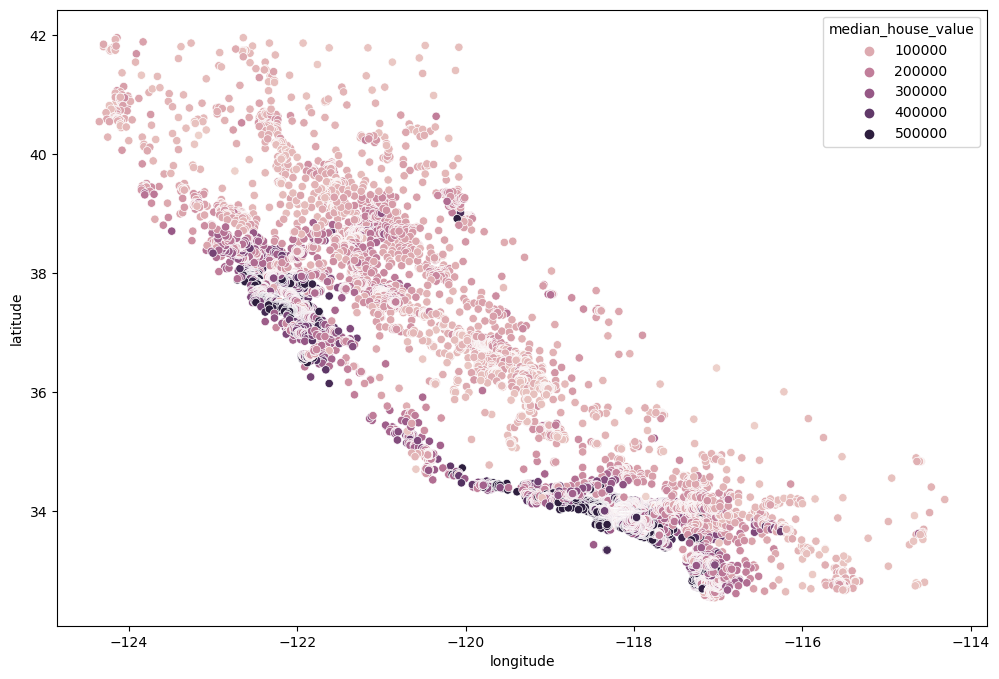

In [16]:
X = df[['longitude', 'latitude']]
y = df['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    shuffle=True, random_state=2022)
sns.scatterplot(x=X['longitude'], y=X['latitude'], hue=y);

In [17]:
### Your code is here
### Отнормируем
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
### Замерим базовое качество Линейной Регрессии
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

lr = LinearRegression().fit(X_train, y_train)
print(f'Linreg Train RMSE: {mean_squared_error(y_train, lr.predict(X_train), squared=False).round(2)}')
print(f'Linreg Test RMSE: {mean_squared_error(y_test, lr.predict(X_test), squared=False).round(2)}')


Linreg Train RMSE: 100948.4
Linreg Test RMSE: 98369.88


In [19]:
### Пробежимся по различным k
all_k = np.arange(1, 10)
rmse_test, rmse_train = [], []

for k in all_k:
    clf = KNeighborsRegressor(n_neighbors=k).fit(X_train, y_train)
    
    rmse_train.append(mean_squared_error(y_train, clf.predict(X_train), squared=False).round(2))
    rmse_test.append(mean_squared_error(y_test, clf.predict(X_test), squared=False).round(2))
    
pd.DataFrame({'k' : all_k,
              'RMSE Train' : rmse_train,
              'RMSE Test' : rmse_test})

,k,RMSE Train,RMSE Test
0,1,34616.73,62929.44
1,2,35413.00,55768.58
2,3,38597.76,54118.87
3,4,40933.48,53456.01
4,5,42765.36,52829.72
5,6,44122.78,52765.77
6,7,45063.96,52500.10
7,8,45897.82,52850.85
8,9,46754.64,52912.18


In [20]:
### Замерим, как меняется качество на трейне и на тесте при разной ширине окна h (используям Гауссово ядро)

rmse_test, rmse_train = [], []

for h in np.arange(0.02, 0.1, 0.01):
    def gaussian_kernel(distances, h=h):
        return np.exp(- distances**2 / h**2)
    
    knn = KNeighborsRegressor(n_neighbors=7, weights=gaussian_kernel)
    knn.fit(X_train, y_train)
    
    rmse_train.append(mean_squared_error(y_train, knn.predict(X_train), squared=False).round(2))
    rmse_test.append(mean_squared_error(y_test, knn.predict(X_test), squared=False).round(2))
    
    
pd.DataFrame({'h' : np.arange(0.02, 0.1, 0.01),
              'RMSE Train' : rmse_train,
              'RMSE Test' : rmse_test})

,h,RMSE Train,RMSE Test
0,0.02,41761.90,52359.94
1,0.03,43056.40,52330.36
2,0.04,43693.26,52334.96
3,0.05,44056.32,52362.91
4,0.06,44280.76,52386.83
5,0.07,44431.86,52403.93
6,0.08,44543.63,52416.75
7,0.09,44632.37,52427.26
